# Looking for the Beauty Higgs decay!

<CENTER><img src="ATLASOD.gif" style="width:50%"></CENTER>

This notebook uses ATLAS Open Data https://opendata.atlas.cern to show you the steps to search for the Higgs to two $b$ quarks decay.

ATLAS Open Data provides open access to proton-proton collision data at the LHC for educational purposes. ATLAS Open Data resources are ideal for high-school, undergraduate and postgraduate students.

Notebooks are web applications that allow you to create and share documents that can contain for example:
1. live code
2. visualisations
3. narrative text


### What is the Higgs boson? 
The Higgs boson is a fundamental particle predicted by the Standard Model. 
It is a manifestation of the Higgs field,
    which gives mass to the fundamental particles.
However,
    it is incredibly hard to produce.
At the LHC, 
    a Higgs particle is produced about once every 10 billion collisions!
This tiny fraction makes it very difficult to detect.
Nevertheless, 
    after years of data collection, 
    the Higgs boson was finally discovered in 2012 by CMS and ATLAS experiments at CERN.
In this tutorial, 
    we shall search for the Higgs as well. 


### Searching for the Higgs
This analysis loosely follows the paper on the [evidence of $H\to b\bar{b}$ decay by ATLAS](https://link.springer.com/article/10.1007/JHEP12(2017)024).

The Higgs boson can be produced in many different ways. 
In particle physics, 
    we describe these production modes using Feynman diagrams.
These diagrams allow us to visualise particle processes while also acting as powerful tools for calculations.
See [here](https://cds.cern.ch/record/2759490/files/Feynman%20Diagrams%20-%20ATLAS%20Cheat%20Sheet.pdf) for more information on Feynman diagrams.

There are four main production modes of the Higgs boson, and their respective Feynman diagrams:
1. Gluon-gluon fusion (top left)
2. Vector boson fusion (top right)
3. Vector boson bremsstrahlung (bottom left)
4. Top-antitop fusion (bottom right)

<CENTER><img src="images/ImagesHiggs/ggH.png" style="width:40%"> <img src="images/ImagesHiggs/VBFH.png" style="width:35%"></CENTER>
<CENTER><img src="images/ImagesHiggs/WH.png" style="width:40%"> <img src="images/ImagesHiggs/ttbarfusion.png" style="width:35%"></CENTER>

The Higgs has a very short lifetime,
    on the order of $10^{-22} \,\text{s}$.
It decays extremely quickly after production,
    so there is no hope of directly detecting the particle.
Nevertheless,
    we can use the Standard Model to predict its 
    decay products: photons, $Z$ bosons, quarks, etc.,
    all with different probabilities.
These **decay channels** can be used to identify the Higgs boson.
In this notebook, 
    we'll be looking at one particular decay channel:
$$H \rightarrow b\bar{b}$$

<CENTER><img src="images/ImagesHiggs/Hbb.png" style="width:40%"></CENTER>


This decay channel actually accounts for almost $60\%$ of all Higgs decays. 
Ideally,
    we would search for collisions which yield two bottom quarks as products and this would tell us that a Higgs boson is present.
Despite this, 
    the Higgs was not discovered through this channel, 
    and this decay was only verified more recently in $2018$.
Why?
In fact, 
    this channel is one of the most difficult to detect at the LHC,
    precisely because proton-proton collisions tend to produce a huge number of $b$ quarks independently of the Higgs.
In addition to the decay signal,
    there are many other **background** processes that lead to two reconstructed $b$ quarks in the final state. 

To make the analysis easier, 
    we will focus on the vector boson bremsstrahlung production channel, 
    in which a $W$ or $Z$ bozon is also created.
Because the leptonic decays of the $W$ and $Z$ have very clean signatures,
    these processes will help us identify the case where the Higgs is produced.
There are three main decay channels where $H\to b\bar{b}$:
1. $0$-lepton products: $Z + H\to \nu\bar{\nu} + b\bar{b}$
2. $1$-lepton products: $W + H\to l\nu  + b\bar{b}$
3. $2$-lepton products: $Z + H\to l\bar{l} + b\bar{b}$

We will focus on the $0$-lepton channel.
This is referred to as our desired **signal**.
In this channel, 
    there are no charged leptons produced, 
    only neutrinos and bottom quarks.
Nevertheless,
    after narrowing our analysis,
    we still have to deal with a lot of background processes.

Wait a second, 
    it turns out that the ATLAS detector cannot detect neutrinos!
How then do we verify our $0$-lepton channel?
Actually, 
    using a physical principle known as conservation of momentum,
    we can indirectly detect the presence of neutrinos.
Since the proton beams in the LHC are travelling axially, 
    the momentum in the transverse/radial direction must sum to zero before and after the collision event.
When a neutrino is created and not directly detected,
    there is some missing transverse energy $E^\text{miss}_T$ that can be calculated from the other decay products.
This missing transverse energy can then be used in calculations which verify the Higgs decay.

One of the main sources of background is that of $V+$ jets processes, 
    where leptons produced can either be lost or misidentified as jets.
<CENTER><img src="images/ImagesHiggs/V+jets.png" style="width:40%"></CENTER>

We also have background contributions from diboson processs $ZZ\to \nu\bar{\nu} + b\bar{b}$ and top-antitop processes. 

<CENTER><img src="images/ImagesHiggs/ZZnunubb.png" style="width:30%"><img src="images/ImagesHiggs/ttbar.png" style="width:30%"></CENTER>

For these backgrounds,
    we will attempt to distinguish them from the Higgs decay using various selection rules.
These selection rules place restrictions on the physical variables in the data,
    such as the relationships between the jet and neutrino angles, 
    or the minimum $E^\text{miss}_T$.
Thus, 
    we can cut away all data with products that do not have these properties.
These selections increase the ratio of our signal to the background.

We can further discern the signal by accounting for the total invariant mass of the two bottom quark products. 
We know through conservation of energy and momentum that the invariant mass of the products must be equal to the Higgs mass, 
    while other background processes will have different invariant masses. 
Our last step would be to plot the invariant mass of each event and spot the peak in mass around $125\, \text{GeV}$,
    which corresponds to the mass of the Higgs boson. 

By the end of this notebook you will be able to:
1. Learn to process large data sets using selections
2. Understand some general principles of a particle physics analysis
3. Search for the Higgs boson!

See [here](https://cds.cern.ch/record/2800577/files/Signal%20and%20Background%20Physics%20Cheat%20Sheet.pdf) for more information on signals and backgrounds!

### Running a Python notebook
A Python notebook consists of cell blocks, 
    each containing lines of Python code.
Each cell can be run independently of each other,
    yielding respective outputs below the cells.
Conventionally,
    cells are run in order from top to bottom.


- To run the whole notebook, in the top menu click Cell $\to$ Run All.

- To propagate a change you've made to a piece of code, click Cell $\to$ Run All Below.

- You can also run a single code cell, by clicking Cell $\to$ Run Cells, or using the keyboard shortcut Shift+Enter.

For more information, 
    refer to [here](https://www.codecademy.com/article/how-to-use-jupyter-notebooks).

We're going to import a number of packages to help us:
* `numpy`: provides numerical calculations such as histogramming
* `matplotlib`: common tool for making plots, figures, images, visualisations
* `uproot`: processes `.root` files typically used in particle physics into data formats used in python
* `awkward`: introduces `awkward` arrays, a format that generalizes `numpy` to nested data with possibly variable length lists
* `vector`: to allow vectorized 4-momentum calculations

In [1]:
import numpy as np # for numerical calculations such as histogramming
import matplotlib.pyplot as plt # for plotting
import matplotlib_inline # to edit the inline plot format
matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg') # to make plots in pdf (vector) format
from matplotlib.ticker import AutoMinorLocator # for minor ticks
import uproot # for reading .root files
import awkward as ak # to represent nested data in columnar format
import vector # for 4-momentum calculations
import time

Unit definitions, as stored in the data files

In [2]:
MeV = 0.001
GeV = 1.0

In [3]:
import pandas as pd

url = "https://opendata.atlas.cern/files/metadata.csv"
metadata = pd.read_csv(url)

metadata.head()

/Users/marianaiv/.local/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,dataset_number,physics_short,e-tag,crossSection_pb,genFiltEff,kFactor,nEvents,sumOfWeights,sumOfWeightsSquared,process,generator,keywords,description,job_path
0,301204,Pythia8EvtGen_A14MSTW2008LO_Zprime_NoInt_ee_SS...,e3723,0.001762,1.0,1.0,20000.0,20000.0,20000.0,pp>Zprime>ee,Pythia8(v8.186)+EvtGen(v1.2.0),"['2electron', 'BSM', 'SSM', 'Zprime', 'electro...",Pythia 8 Zprime decaying to two electrons',https://gitlab.cern.ch/atlas-physics/pmg/infra...
1,301209,Pythia8EvtGen_A14MSTW2008LO_Zprime_NoInt_mumu_...,e3723,0.001772,1.0,1.0,20000.0,20000.0,20000.0,pp>Zprime>mm,Pythia8(v8.186)+EvtGen(v1.2.0),"['2muon', 'BSM', 'SSM', 'Zprime', 'electroweak...",Pythia 8 Zprime decaying to two muons',https://gitlab.cern.ch/atlas-physics/pmg/infra...
2,301243,Pythia8EvtGen_A14NNPDF23LO_Wprime_enu_SSM3000,e3886,0.011414,1.0,1.0,8000.0,8000.0,8000.0,pp>Wprime>enu,Pythia8(v8.186)+EvtGen(v1.2.0),"['BSM', 'SSM', 'Wprime', 'electroweak', 'heavy...",Pythia 8 Wprime decaying to enu',https://gitlab.cern.ch/atlas-physics/pmg/infra...
3,301247,Pythia8EvtGen_A14NNPDF23LO_Wprime_munu_SSM3000,e3886,0.011432,1.0,1.0,20000.0,20000.0,20000.0,pp>Wprime>munu,Pythia8(v8.186)+EvtGen(v1.2.0),"['BSM', 'SSM', 'Wprime', 'electroweak', 'heavy...",Pythia 8 Wprime decaying to munu',https://gitlab.cern.ch/atlas-physics/pmg/infra...
4,301333,Pythia8EvtGen_A14NNPDF23LO_zprime3000_tt,e3723,0.005084,1.0,1.0,30000.0,30000.0,30000.0,pp>Zprime>ttbar,Pythia8(v8.186)+EvtGen(v1.2.0),"['BSM', 'Zprime', 'resonance', 'ttbar']","SSM Z prime (+str(m_zprime)+"") to ttbar""",https://gitlab.cern.ch/atlas-physics/pmg/infra...


## Example 1: Reading data 

We would like to read some of the data from the open dataset.

In [4]:
# CERN open database URL
#path = "https://atlas-opendata.web.cern.ch/atlas-opendata/13TeV/bb0L/"
path = 'exactly2bjets/'

For convenient naming and identification purposes,
    we define a dictionary which stores all the important names of the samples we want to pull from the directory.

In [5]:
samples = {
    'Data' : {
        'list' : ['data15_periodD.root',
                  'data15_periodE.root',
                  'data15_periodF.root',
                  'data15_periodG.root',
                  'data15_periodH.root',
                  'data15_periodJ.root',
                  'data16_periodA.root',
                  'data16_periodB.root',
                  'data16_periodC.root',
                  'data16_periodD.root',
                  'data16_periodE.root',
                  'data16_periodF.root',
                  'data16_periodG.root',
                  'data16_periodI.root',
                  'data16_periodK.root',
                  'data16_periodL.root'
                ],
    },
    
    'Signal' : {
        'list' : ['345056.PowhegPythia8EvtGen_NNPDF3_AZNLO_ZH125J_MINLO_vvbb_VpT.exactly2bjets.root',
                '345058.PowhegPythia8EvtGen_NNPDF3_AZNLO_ggZH125_vvbb.exactly2bjets.root'],
        'color' : "blue"
    },
    r'Background $t\bar{t}$' : {
        'list' : ['410470.PhPy8EG_A14_ttbar_hdamp258p75_nonallhad.exactly2bjets.root'], 
        'color' : "yellow"
    },
    'Background Single top' : {
        'list' : ['410644.PowhegPythia8EvtGen_A14_singletop_schan_lept_top.exactly2bjets.root',
                '410645.PowhegPythia8EvtGen_A14_singletop_schan_lept_antitop.exactly2bjets.root',
                '410658.PhPy8EG_A14_tchan_BW50_lept_top.exactly2bjets.root',
                '410659.PhPy8EG_A14_tchan_BW50_lept_antitop.exactly2bjets.root'],
        'color' : "grey"
    },
    r'Background $V+$jets' : {
        'list' : ['700335.Sh_2211_Znunu_pTV2_BFilter.exactly2bjets.root',
                '700336.Sh_2211_Znunu_pTV2_CFilterBVeto.exactly2bjets.root',
                '700337.Sh_2211_Znunu_pTV2_CVetoBVeto.exactly2bjets.root',
                '700467.Sh_2211_Zee_maxHTpTV2_m10_40_pT5_BFilter.exactly2bjets.root',
                '700468.Sh_2211_Zee_maxHTpTV2_m10_40_pT5_CFilterBVeto.exactly2bjets.root',
                '700469.Sh_2211_Zee_maxHTpTV2_m10_40_pT5_CVetoBVeto.exactly2bjets.root',
                '700470.Sh_2211_Zmumu_maxHTpTV2_m10_40_pT5_BFilter.exactly2bjets.root',
                '700471.Sh_2211_Zmumu_maxHTpTV2_m10_40_pT5_CFilterBVeto.exactly2bjets.root',
                '700472.Sh_2211_Zmumu_maxHTpTV2_m10_40_pT5_CVetoBVeto.exactly2bjets.root',
                '700792.Sh_2214_Ztautau_maxHTpTV2_BFilter.exactly2bjets.root',
                '700793.Sh_2214_Ztautau_maxHTpTV2_CFilterBVeto.exactly2bjets.root',
                '700794.Sh_2214_Ztautau_maxHTpTV2_CVetoBVeto.exactly2bjets.root'],
        'color' : "red"
    },
    'Background Diboson' : {
        'list' : ['700488.Sh_2211_WlvWqq.exactly2bjets.root',
                '700489.Sh_2211_WlvZqq.exactly2bjets.root',
                '700490.Sh_2211_WlvZbb.exactly2bjets.root',
                '700491.Sh_2211_WqqZvv.exactly2bjets.root',
                '700492.Sh_2211_WqqZll.exactly2bjets.root',
                '700493.Sh_2211_ZqqZll.exactly2bjets.root',
                '700494.Sh_2211_ZbbZll.exactly2bjets.root',
                '700495.Sh_2211_ZqqZvv.exactly2bjets.root',
                '700496.Sh_2211_ZbbZvv.exactly2bjets.root',
                '700195.Sh_2210_eegammagamma.exactly2bjets.root',
                '700196.Sh_2210_mumugammagamma.exactly2bjets.root',
                '700199.Sh_2210_enugammagamma.exactly2bjets.root',
                '700200.Sh_2210_munugammagamma.exactly2bjets.root',
                '700201.Sh_2210_taunugammagamma.exactly2bjets.root'],
        'color' : "green"
    }
}

The key named `Data` refers to the event information collected from real experiments,
    while the `Background` and `Signal` keys refer to Monte-Carlo (MC) simulations of the ATLAS experiments.
Both real data and MC data will then be analysed and compared together to discover the Higgs! 

Let's try accessing `data_15` in the Open Data URL as an example.

In [6]:
# Print the samples dict for the key 'data'
print(samples['Data'])

# We shall use the first entry in 'list', 'data15.EOD_0L.root'
value = samples['Data']['list'][0]
print(f"{value=}")

# This is now appended to our file path to retrieve the data_15 file
data_15_path = 'exactly2bjets/' + "Data/" + value 

{'list': ['data15_periodD.root', 'data15_periodE.root', 'data15_periodF.root', 'data15_periodG.root', 'data15_periodH.root', 'data15_periodJ.root', 'data16_periodA.root', 'data16_periodB.root', 'data16_periodC.root', 'data16_periodD.root', 'data16_periodE.root', 'data16_periodF.root', 'data16_periodG.root', 'data16_periodI.root', 'data16_periodK.root', 'data16_periodL.root']}
value='data15_periodD.root'


Next, we shall try opening the `data_15` file to see what is inside.
In the file (called a `tree`),
    there are many entries, 
    one for each event.
In each event,
    a dictionary stores the all relevant information as keys, such as the event number (`eventNumber`), lepton transverse momentum (`lep_pt`), etc.  
Details on the variables in the dictionary can be viewed [here](https://cds.cern.ch/record/2707171/files/ANA-OTRC-2019-01-PUB-updated.pdf) in Appendix A.

More information on trees can be viewed [here](https://masonproffitt.github.io/uproot-tutorial/03-trees/index.html).

In [7]:
# Accessing the file from the online directory (":mini" opens the tree in a desired manner)
with uproot.open(data_15_path + ":analysis") as t:
    tree = t

# There are 39 entries in the tree
print(tree.num_entries)

# We can view all the information stored in the tree using the .keys() method.
tree.keys()

5691


['num_events',
 'sum_of_weights',
 'sum_of_weights_squared',
 'corrected_xsec',
 'dsid',
 'category',
 'is_bjet',
 'n_bjet',
 'ScaleFactor_PILEUP',
 'mcWeight',
 'xsec',
 'filteff',
 'kfac',
 'channelNumber',
 'eventNumber',
 'runNumber',
 'trigP',
 'trigDT',
 'trigT',
 'trigE',
 'trigM',
 'trigMET',
 'ScaleFactor_BTAG',
 'jet_n',
 'jet_pt',
 'jet_eta',
 'jet_phi',
 'jet_e',
 'jet_btag_quantile',
 'jet_jvt',
 'largeRJet_n',
 'largeRJet_pt',
 'largeRJet_eta',
 'largeRJet_phi',
 'largeRJet_e',
 'largeRJet_m',
 'largeRJet_D2',
 'ScaleFactor_ELE',
 'ScaleFactor_MUON',
 'scaleFactor_LepTRIGGER',
 'lep_n',
 'lep_type',
 'lep_pt',
 'lep_eta',
 'lep_phi',
 'lep_e',
 'lep_charge',
 'lep_ptvarcone30',
 'lep_topoetcone20',
 'lep_z0',
 'lep_d0',
 'lep_d0sig',
 'lep_isTightID',
 'lep_isMediumID',
 'lep_isLooseID',
 'lep_isTightIso',
 'lep_isLooseIso',
 'ScaleFactor_PHOTON',
 'photon_n',
 'photon_pt',
 'photon_eta',
 'photon_phi',
 'photon_e',
 'photon_ptcone20',
 'photon_topoetcone40',
 'photon_isL

Perhaps we'd like to see the jet energies. 
We can access this from our tree using the key `jet_e`. 
Also, 
    from this point on we shall be manipulating our tree arrays using the `awkward` library.
We can use `library="ak"` in the argument of the `.arrays()` method to use this library.
If you ever see `library="ak"` in the code,
    it means that the array is output as an `awkward` array.

In [8]:
tree["jet_e"].arrays(library="ak")

<Array [{jet_e: [585, ..., 32.7]}, ..., {...}] type='5691 * {jet_e: var * f...'>

In our analysis, 
    not all the information in the tree is important.
We can store the important variables in a list and retrieve them from the tree later on.
As it turns out, 
    we will need the following set of variables:

In [9]:
# Define what variables are important to our analysis
variables = ['jet_n', 'jet_pt', 'jet_eta', 'jet_phi', 'jet_e', 'met', 'met_phi', 'trigMET', 'jet_btag_quantile', 'lep_e', 'lep_isTightID']

Now that we understand how to access the information in the `data_15` tree,
    we can begin analysis.
As mentioned in the introduction,
    there are two steps to be completed for each event entry: **selections** and **mass calculation**.

### Selections 
Our goal is to isolate the signal from our background. 
To do this, 
    we must introduce various filters and selections on the data that preserve the signal while cutting away the background. 
In its current state, 
    the data contains many unwanted detections and false positives. 
There are many reasons for this. 
For one, 
    it is possible to misidentify leptons as jets.
Some of our selections will aim to cut away such misidentifications based on the properties of the jets. 

These are the selections that we want to make on the data:

**MET:** Passes the online missing transverse energy (MET) trigger. 
Also, offline we require  $E^\text{miss}_T>150 \,\text{GeV}$ .

- For more information on triggers, refer to [here](https://cds.cern.ch/record/2775198/files/Trigger%20and%20Data%20Acquisition.pdf)

**Lepton cuts:** Events must not contain any loose leptons.
 - A set of cuts that determine the level of efficiency of a lepton identification algorithm
 - Looseness and tightness of lepton detections define a strictness criteria for whether a lepton was truly detected.
 - In the selection, 
    loose leptons are defined via the inverse of the tightness ID, 
    and also have $E_T > 25 \, \text{GeV}.$

**Jet cuts:** Exactly two or three jets. All jets must have $p_T > 20 \, \text{GeV}$ and $|η| < 2.5$.

- Since the Higgs decays to two $b$ quarks, 
    we expect at least two jets in the desired signal.
We shall restrict our selection up to three jets, 
    rejecting events with four or more jets. 
This will reduce the large background arising from $t\bar{t}$ production.
- We restrict the value of $\eta$ because this is the accessible range of the inner detector which we use for $b$-tagging.

**$b$-tagging:** Exactly two $b$-tagged jets. For the $b$-tagged jet with highest $p_T$, we require $p_T > 45 \, \text{GeV}$.

- A $b$-tagged jet is simply a jet that has been identified to be originating from a $b$ quark. 
Because there are two $b$ quarks in the Higgs decay, 
    we demand only events with two of such jets.
In practice, 
    a jet will be $b$-tagged if its $b$-tag quantile is equal to $2$.
- We also place a lower bound cut on the $p_T$ of the leading $b$ quark, 
    as this will significantly reduce the contribution of background processes,
    increasing the significance of the Higgs signal.

**Sum of jet $p_T$:** $H_T > 120 \, \text{GeV} $

 - This selection is used to remove a marginal region of phase space in which the trigger efficiency exhibits a small dependence on the jet multiplicity.

**Angular selections:** Require $\Delta\phi$ between two $b$-tagged jets  $<140^\circ$, 
    $\Delta\phi$ between $E_T^\text{miss}$ and sum of $b$-tagged jets $>120^\circ$, 
    and minimum $\Delta\phi$ between $E_T^\text{miss}$ and various jets must be $>20^\circ$ for two-jet events and $>30^\circ$ for three-jet events.

 - These angular selection criteria are applied in order to suppress multi-jet background.
These backgrounds mostly consist of jets mismeasured in the calorimeters.

Let's try to perform some of these calculations for a set of example events.

In [10]:
example_events = ak.Array({'jet_n':[2,2,3,0],
                      'jet_pt':[[21,21],[30,15],[70,30,30],[]], 
                      'jet_phi':[[2, 3], [-2, -2], [-11, 222, 300], []],
                      'jet_eta':[[-1,1],[-3,1],[-1,-1,0],[]], 
                      'jet_e':[[-1,1],[-3,1],[-1,-1,0],[]], 
                      'jet_btag_quantile':[[2,2], [2, 2], [2, 2, 2],[]],
                      'met_phi': [40,20,20,40],
                      'met': [40,20,20,160],
                      'trigMET': [True, True, True, True]})

In [11]:
# This block is currently unused, but would be useful if one would prefer to run the examples on
# data_15 instead of an example array
with uproot.open(data_15_path + ":analysis") as t:
    tree = t

# Using tree.iterate, we can load the variables that we want and ignore the rest, saving resources
for data in tree.iterate(variables,
                            library="ak",
                            entry_stop=tree.num_entries): # process up to numevents*fraction
    data_jet = data

To perform $b$-tagging, 
    let us create a $b$-tag ID for each jet.

In [12]:
example_events['btag_ID'] = (example_events['jet_btag_quantile'] == 2)

Now, 
    we check that there are only two $b$-tagged jets,
    as mentioned in our selection rules. 

In [13]:
btag_jets_n = ak.sum(example_events['btag_ID'], 1)
select_exactly_2_b = btag_jets_n == 2
select_exactly_2_b

<Array [True, True, False, False] type='4 * bool'>

We see that the first two jets have exactly two $b$-tagged,
    while the last two fail this requirement.
We can also do other selections.

In [14]:
# Apply MET trigger
MET_trigger = example_events['trigMET'] 
print(f'Passes MET trigger? {MET_trigger}')

# Apply MET > 150 GeV
missing_ET = example_events['met'] 
missing_ET_bool = missing_ET > 150 * GeV
print(f'Passes MET cut? {missing_ET_bool}')

Passes MET trigger? [True, True, True, True]
Passes MET cut? [False, False, False, True]


All our events pass the MET trigger, 
    but only the last event passes the MET cut.

The other selections have been written below as functions. 
You may test these selection functions on the `example_events` from above,
    or define your own examples to see how they work.

In [15]:
def select_2or3_jets(data):
    # exactly two or three jets
    select_2or3_jets = (data['jet_n']==2) | (data['jet_n']==3)
    return select_2or3_jets

def select_pt_eta(data):
    # jets with pT > 20 GeV and |η| < 2.5
    pT_selection = data['jet_pt'] > 20 * GeV
    eta_selection = abs(data['jet_eta']) < 2.5
    selected_jets = pT_selection & eta_selection
    select_pt_eta = ak.all(selected_jets,1)
    return select_pt_eta

def select_exactly_2_b(data):
    # exactly two jets should be b-tagged
    # data['btag_ID'] = (data['jet_btag_quantile'] == 2)
    btag_jets_n = ak.sum(data['btag_ID'], 1)
    select_exactly_2_b = btag_jets_n == 2
    return select_exactly_2_b

In [16]:
def select_max_pt_jet(data):
    # highest pT b-tagged jet require pT > 45 GeV
    # data['btag_ID'] = (data['jet_btag_quantile'] == 2)
    btag_jet_pt = data['btag_ID'] * data['jet_pt'] 
    select_max_pt_jet = ak.max(btag_jet_pt, 1) > 45 * GeV
    # select_max_pt_jet = ak.fill_none(select_max_pt_jet, False) 
    return select_max_pt_jet

def select_HT(data):
    # HT (sum of jet pt) must be more than 120 GeV
    HT = ak.sum(data['jet_pt'], 1)
    select_HT = HT > 120 * GeV 
    return select_HT

def select_2b_phi(data):
    # azimuthal angle between two btagged jets less than 140 degrees
    # data['btag_ID'] = (data['jet_btag_quantile'] == 2)
    btag_jet_phi = data['jet_phi'][data['btag_ID']]
    padded_array = ak.pad_none(btag_jet_phi, 2)
    differences = abs(padded_array[:,0] - padded_array[:,1])
    select_2b_phi = differences < (140 * np.pi/180)
    # select_2b_phi = ak.fill_none(select_2b_phi, False) 
    return select_2b_phi

def select_metbb_phi(data):
    # azimuthal angle between met and sum of btagged jets more than 120 degrees
    # data['btag_ID'] = (data['jet_btag_quantile'] == 2)
    btag_jet_pt = data['jet_pt'][data['btag_ID']]
    btag_jet_eta = data['jet_eta'][data['btag_ID']]
    btag_jet_phi = data['jet_phi'][data['btag_ID']]
    btag_jet_e = data['jet_e'][data['btag_ID']]

    padded_pt = ak.pad_none(btag_jet_pt, 2)
    padded_eta = ak.pad_none(btag_jet_eta, 2)
    padded_phi = ak.pad_none(btag_jet_phi, 2)
    padded_e = ak.pad_none(btag_jet_e, 2)

    p = vector.zip({"pt": padded_pt, "eta": padded_eta, "phi": padded_phi, "E": padded_e})
    bb_jet_phi = (p[:,0]+p[:,1]).phi

    met_phi = data['met_phi']

    difference = abs(met_phi-bb_jet_phi)
    select_metbb_phi = difference > (120 * np.pi/180)

    return select_metbb_phi

def select_min_metjets_phi(data):
    # Minimum of azimuthal angle between met and jets more than 20 degrees for 2 jets, 
                                                              # 30 degrees for 3 jets
    met_phi = data['met_phi']
    jet_phi = data['jet_phi']

    differences = abs(jet_phi - met_phi)
    minimum = ak.min(differences, 1)
    select_min_metjets_phi = ((minimum > 20 *np.pi/180) * (data['jet_n'] ==2) 
                              |(minimum > 30 *np.pi/180) * (data['jet_n'] ==3))

    return select_min_metjets_phi

def lepton_loose(events): # Loose leptons are those that are not tight, and also have ET > 25 GeV
    return (~events['lep_isTight']) & (events['lep_e'] > 25 * GeV)

Next, we shall do the mass calculation. 

### Mass calculation
The data to be plotted is the total invariant mass of the two bottom quarks ($b$-tagged jets), which can be found using the equation: $$m_\text{bb} = \sqrt{E^2_\text{tot}-\mathbf{p}_\text{tot}\cdot\mathbf{p}_\text{tot}}$$
in units where $c=1$.
$E_\text{tot}$ is the total energy and $\mathbf{p}_\text{tot}$ is the total momentum.
This calculation is performed using the vector array method `.M` on the sum of jet 4-momenta (`jet_pt`,`jet_eta`,`jet_phi`,`jet_e`).
We can see this in the following function.

In [17]:
# Calculate invariant mass of the two b-tagged jets
# [:, i] selects the i-th  in each event
def calc_mass(data):
    btag_jet_pt = data['jet_pt'][data['btag_ID']]
    btag_jet_eta = data['jet_eta'][data['btag_ID']]
    btag_jet_phi = data['jet_phi'][data['btag_ID']]
    btag_jet_e = data['jet_e'][data['btag_ID']]

    p = vector.zip({"pt": btag_jet_pt, "eta": btag_jet_eta, "phi": btag_jet_phi, "E": btag_jet_e})
    invariant_mass = (p[:, 0] + p[:, 1]).M # .M calculates the invariant mass
    return invariant_mass

In [18]:
# Performing the calculation for the first two events (with 2 b-tagged jets)
calc_mass(example_events[0:2])

<Array [-36.9, -286] type='2 * float64'>

You may verify on your own that these functions give the same outputs as the previous code block.
Now, 
    we shall apply these functions over the entire `data_15` tree using a `for` loop.

In [19]:
# Define empty list to hold all data for this sample
sample_data = []

# Perform the cuts for each data entry in the tree
for data in tree.iterate(variables, library="ak"): # the data will be in the form of an awkward array

    # Event Selection (reference: https://arxiv.org/pdf/1409.6212)

    # Generate btag identifier
    data['btag_ID'] = (data['jet_btag_quantile'] == 2)

    # data = data[lepton_loose(data)] # Select Events containing no loose leptons
    data = data[data['trigMET']] # Apply MET trigger 
    data = data[data['met'] > 30 * GeV] # MET>30 GeV 
    data = data[(data['jet_n']==2) | (data['jet_n']==3)] # 2 or 3 jets
    data = data[select_pt_eta(data)]
    data = data[select_exactly_2_b(data)]

    data = data[select_max_pt_jet(data)]
    data = data[select_HT(data)]
    data = data[select_2b_phi(data)]
    data = data[select_metbb_phi(data)]
    data = data[select_min_metjets_phi(data)]

    # Invariant Mass
    data['mass'] = calc_mass(data)

    # Append data to the whole sample data list
    sample_data.append(data)

# turns sample_data back into an awkward array
data_15 = ak.concatenate(sample_data)

We can now plot the data using Matplotlib. 
The data will be turned into a histogram,
    with bins of width $5 \,\text{GeV}$.
Note that much of the code written here is meant for the aesthetics of the plot.

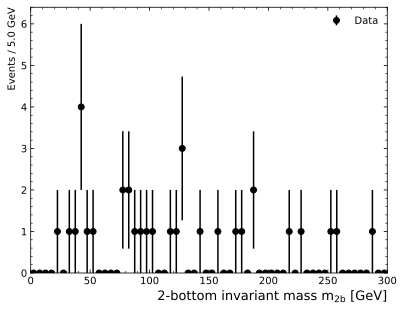

In [20]:
# x-axis range of the plot
xmin = 0 * GeV
xmax = 300 * GeV

# Histogram bin setup
step_size = 5 * GeV
bin_edges = np.arange(start=xmin, # The interval includes this value
                    stop=xmax+step_size, # The interval doesn't include this value
                    step=step_size ) # Spacing between values
bin_centres = np.arange(start=xmin+step_size/2, # The interval includes this value
                        stop=xmax+step_size/2, # The interval doesn't include this value
                        step=step_size ) # Spacing between values

# Creating histogram from data
data_x,_ = np.histogram(ak.to_numpy(data_15['mass']), 
                        bins=bin_edges ) # histogram the data
data_x_errors = np.sqrt( data_x ) # statistical error on the data

# *************
# Main plot 
# *************
main_axes = plt.gca() # get current axes

# plot the data points
main_axes.errorbar(x=bin_centres, y=data_x, yerr=data_x_errors,
                    fmt='ko', # 'k' means black and 'o' is for circles 
                    label='Data') 

# set the x-limit of the main axes
main_axes.set_xlim( left=xmin, right=xmax ) 

# separation of x axis minor ticks
main_axes.xaxis.set_minor_locator( AutoMinorLocator() ) 

# set the axis tick parameters for the main axes
main_axes.tick_params(which='both', # ticks on both x and y axes
                        direction='in', # Put ticks inside and outside the axes
                        top=True, # draw ticks on the top axis
                        right=True ) # draw ticks on right axis

# x-axis label
main_axes.set_xlabel(r'$2$-bottom invariant mass $\mathrm{m_{2b}}$ [GeV]',
                    fontsize=13, x=1, horizontalalignment='right' )

# write y-axis label for main axes
main_axes.set_ylabel('Events / '+str(step_size)+' GeV',
                        y=1, horizontalalignment='right') 

# set y-axis limits for main axes
main_axes.set_ylim( bottom=0, top=np.amax(data_x)*1.6 )

# add minor ticks on y-axis for main axes
main_axes.yaxis.set_minor_locator( AutoMinorLocator() ) 

# draw the legend
main_axes.legend( frameon=False ); # no box around the legend

Great,
    we managed to plot `data_15`! 
Now, 
    we have not discussed how to deal with the Monte-Carlo simulation data,
    or even what they are for. 
Let us explain.

## Example 2: Reading Monte-Carlo data


Using the Standard Model, 
    we can do a set of randomised simulations to produce a set of theoretical data points to compare to our ATLAS data.
These are known as Monte-Carlo(MC) simulations.
There is one important change to be made to the MC data before we can compare them with our ATLAS data:
 - **Weights** - The MC data was computed in ideal circumstances. 
    The real ATLAS detector has some inefficiencies,
        which we can account for by attributing the appropriate weight to each data point.
    The weight of a data point affects how it contributes to the histogram count for its bin.

Let's open an MC file.

In [21]:
# We open an MC data file with sample value "Zee" using samples and infofile for reference of filenames
print(samples['Background Diboson'])
value = samples['Background Diboson']["list"][0]

# This is now appended to our file path to retrieve the root file
background_diboson = path + "MC/" + value

# Accessing the file from the online directory
with uproot.open(background_diboson + ":analysis") as t:
    tree = t

{'list': ['700488.Sh_2211_WlvWqq.exactly2bjets.root', '700489.Sh_2211_WlvZqq.exactly2bjets.root', '700490.Sh_2211_WlvZbb.exactly2bjets.root', '700491.Sh_2211_WqqZvv.exactly2bjets.root', '700492.Sh_2211_WqqZll.exactly2bjets.root', '700493.Sh_2211_ZqqZll.exactly2bjets.root', '700494.Sh_2211_ZbbZll.exactly2bjets.root', '700495.Sh_2211_ZqqZvv.exactly2bjets.root', '700496.Sh_2211_ZbbZvv.exactly2bjets.root', '700195.Sh_2210_eegammagamma.exactly2bjets.root', '700196.Sh_2210_mumugammagamma.exactly2bjets.root', '700199.Sh_2210_enugammagamma.exactly2bjets.root', '700200.Sh_2210_munugammagamma.exactly2bjets.root', '700201.Sh_2210_taunugammagamma.exactly2bjets.root'], 'color': 'green'}


In [22]:
tree.num_entries

19817

Again, 
    not all weights are important to our analysis. 
In our case, 
    these are:
- `xsec` - cross section 
- `mcWeight` - specific Monte-Carlo weight associated with each event
- `scaleFactor_PILEUP` - scale factor for pileup reweighting
- `scaleFactor_BTAG` - scale factor for b-tagging
- `filteff`- filter efficiency of MC generator
- `kfac` - multiplicative correction factor used to account for higher-order effects in theoretical calculations

Scale factors are generally related to estimates of the efficiencies and resolutions of detectors.

In [23]:
weight_variables = ['xsec', 'mcWeight', 'ScaleFactor_PILEUP', 'ScaleFactor_BTAG', 'filteff', 'kfac', 'sum_of_weights']

# For example, see below for the weights corresponding to muon rejection
tree["ScaleFactor_BTAG"].arrays(library = "ak")

<Array [{ScaleFactor_BTAG: 0.865}, ..., {...}] type='19817 * {ScaleFactor_B...'>

There is one more important variable,
    which is the integrated luminosity `lumi`,
    also written as $\int L \text{d}t$.
When `lumi` is multiplied by the cross section `xsec`,
    it gives a measure of the total number of events during a period of data taking.
For `data_15`,
    `lumi` has a value of $3.2 \,\text{fb}^{-1}$.
For more on cross sections and luminosities, 
    [see this cheatsheet](https://cds.cern.ch/record/2800578/files/Cross%20Section%20and%20Luminosity%20Physics%20Cheat%20Sheet.pdf).

To calculate the total weight of a Monte-Carlo event, 
    we use the following definition:
$$ w_\text{total} = \frac{\int L \text{d}t ~ \times \sigma \times w_\text{event} \times \text{scale-factors} \times \text{filter-efficiency} \times \text{k-factor}  }{ \sum_i w_i } $$
We can see that the weights are normalised by dividing through by $\sum_i w_i$, 
    the sum of weights `sumw`.

Now,
    with all the weights we've defined, 
    we will define a function that calculates a total weight for an event,
    which is the collective product of all the weights.

In [24]:
metadata.loc[metadata.dataset_number == int(value.split('.')[0]), 'sumOfWeights'].values[0]

983201922502.4636

In [25]:
lumi = 36 # fb-1 for data_15 only

# def calc_weight(events, sumw):
#     return (
#         (lumi*1000 #*1000 to go from fb-1 to pb-1
#         * events['xsec'] 
#         * events['mcWeight']
#         * events['ScaleFactor_PILEUP']
#         * events['ScaleFactor_BTAG']
#         * events['filteff']
#         * events['kfac']
#         / sumw)
#         #* events.scaleFactor_LepTRIGGER
#     )

def calc_weight(events):
    return (
        (lumi*1000 #*1000 to go from fb-1 to pb-1
        * events['xsec'] 
        * events['mcWeight']
        * events['ScaleFactor_PILEUP']
        * events['ScaleFactor_BTAG']
        * events['filteff']
        * events['kfac']
        / events['sum_of_weights'])
        #* events.scaleFactor_LepTRIGGER
    )

#sumweights = metadata.loc[metadata.dataset_number == int(value.split('.')[0]), 'sumOfWeights'].values[0]

# Let's use the first event of our tree
# event = tree.arrays()[0] # This line takes very long, iterate is much faster
for data in tree.iterate(weight_variables, library = 'ak'):
    event = data[0]
    break
print(f"{calc_weight(event) = :.4f}")

calc_weight(event) = 0.0185


This calculation means that in our final histogram, 
    this event will be represented with ~$0.0092$ of a single count in the bin.
Now, we can apply the cuts as before to plot the MC data.
The code is the same as before,
    but we make sure to add in `weight_variables` to our `tree.iterate()`,
    and we store the weights in each event using a new dictionary key.

In [26]:
# Define empty list to hold all data for this sample
sample_data = []

# Perform the cuts for each data entry in the tree
for data in tree.iterate(variables + weight_variables, library="ak"): # the data will be in the form of an awkward array
    # Event Selection (reference: https://arxiv.org/pdf/1409.6212)

    # Generate btag identifier
    data['btag_ID'] = (data['jet_btag_quantile'] == 2)

    # data = data[lepton_loose(data)] # Select Events containing no loose leptons
    data = data[data['trigMET']] # Apply MET trigger 
    data = data[data['met'] > 30 * GeV] # MET>30 GeV 
    data = data[(data['jet_n']==2) | (data['jet_n']==3)] # 2 or 3 jets
    data = data[select_pt_eta(data)]
    data = data[select_exactly_2_b(data)]

    data = data[select_max_pt_jet(data)]
    data = data[select_HT(data)]
    data = data[select_2b_phi(data)]
    data = data[select_metbb_phi(data)]
    data = data[select_min_metjets_phi(data)]

    # Invariant Mass
    data['mass'] = calc_mass(data)

    # Total Weights
    data['totalWeight'] = calc_weight(data)

    # Append data to the whole sample data list
    sample_data.append(data)

# turns sample_data back into an awkward array
background_diboson = ak.concatenate(sample_data)

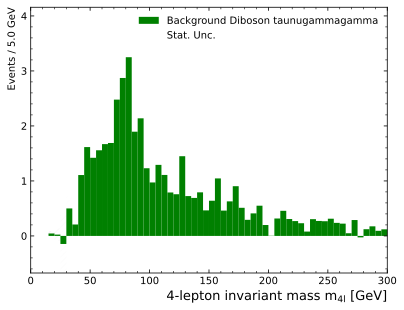

In [27]:
mc_x = ak.to_numpy(background_diboson["mass"]) # define list to hold the Monte Carlo histogram entries
mc_weights = ak.to_numpy(background_diboson["totalWeight"]) # define list to hold the Monte Carlo weights
mc_colors = samples['Background Diboson']['color'] # define list to hold the colors of the Monte Carlo bars
mc_labels = "Background Diboson taunugammagamma" # define list to hold the legend labels of the Monte Carlo bars

# *************
# Main plot 
# *************
main_axes = plt.gca() # get current axes

# plot the data points
# main_axes.errorbar(x=bin_centres, y=data_x, yerr=data_x_errors,
#                     fmt='ko', # 'k' means black and 'o' is for circles 
#                     label='Data') 

# plot the Monte Carlo bars
mc_heights = main_axes.hist(mc_x, bins=bin_edges, 
                            weights=mc_weights, stacked=True, 
                            color=mc_colors, label=mc_labels )

mc_x_tot = mc_heights[0] # stacked background MC y-axis value

# calculate MC statistical uncertainty: sqrt(sum w^2)
mc_x_err = np.sqrt(np.histogram(np.hstack(mc_x), bins=bin_edges, weights=np.hstack(mc_weights)**2)[0])

# plot the statistical uncertainty
main_axes.bar(bin_centres, # x
                2*mc_x_err, # heights
                alpha=0.5, # half transparency
                bottom=mc_x_tot-mc_x_err, color='none', 
                hatch="////", width=step_size, label='Stat. Unc.' )

# set the x-limit of the main axes
main_axes.set_xlim( left=xmin, right=xmax ) 

# separation of x axis minor ticks
main_axes.xaxis.set_minor_locator( AutoMinorLocator() ) 

# set the axis tick parameters for the main axes
main_axes.tick_params(which='both', # ticks on both x and y axes
                        direction='in', # Put ticks inside and outside the axes
                        top=True, # draw ticks on the top axis
                        right=True ) # draw ticks on right axis

# x-axis label
main_axes.set_xlabel(r'4-lepton invariant mass $\mathrm{m_{4l}}$ [GeV]',
                    fontsize=13, x=1, horizontalalignment='right' )

# write y-axis label for main axes
main_axes.set_ylabel('Events / '+str(step_size)+' GeV',
                        y=1, horizontalalignment='right') 

# set y-axis limits for main axes
# main_axes.set_ylim( bottom=0, top=np.amax(data_x)*1.6 )

# add minor ticks on y-axis for main axes
main_axes.yaxis.set_minor_locator( AutoMinorLocator() ) 

# draw the legend
main_axes.legend( frameon=False ); # no box around the legend

## Final Analysis

Now that we understand all the steps of our analysis,
    all that's left is to import the entire ATLAS data and implement it.
The `samples` dictionary will be useful for this.

We will loop over all values in the `samples` dictionary.
Depending on whether it is a data sample or MC sample, 
    `fileString` will change,
    which opens the correct file on the open data folder.
As before, 
    the selections, 
    mass calculations and MC weight calculations will be performed for each sample value,
    and then stored in the array.
The data will all be concatenated into `all_data` for plotting.

In [28]:
fraction = 1
# Define empty dictionary to hold awkward arrays
all_data = {}

# Loop over samples
for s in samples:
    # Print which sample is being processed
    print('Processing '+s+' samples')

    # Define empty list to hold data for each sample
    frames = []

    # Loop over each file
    for val in samples[s]['list']:
        # if "16" in val:
        #     print("\tdata16 ignored")
        #     continue
        if s == 'Data':
            prefix = "Data/" # Data prefix
        else: # MC prefix
            prefix = "MC/"

        fileString = path+prefix+val # +".4lep.root" # file name to open

        # start the clock
        start = time.time()
        print("\t"+val+":")

        # Open file
        with uproot.open(fileString + ":analysis") as t:
            tree = t

        sample_data = []
        if prefix == 'MC/':
            print(f"val: {val.split('.')}, val_n = {val.split('.')[0]}")
            sumweights = metadata.loc[metadata.dataset_number == int(val.split('.')[0]), 'sumOfWeights'].values[0]
        # Loop over data in the tree
        for data in tree.iterate(variables + weight_variables,
                                 library="ak",
                                 entry_stop=tree.num_entries*fraction): # process up to numevents*fraction
                                 #step_size = 1000000):

            padded_array = ak.pad_none(data['jet_pt'], 2)
            data['leading_jet_pt'] = padded_array[:, 0]
            data['subleading_jet_pt'] = padded_array[:, 1]
            padded_array = ak.pad_none(data['jet_eta'], 2)
            data['leading_jet_eta'] = padded_array[:, 0]
            data['subleading_jet_eta'] = padded_array[:, 1]

            # Event Selection (reference: https://arxiv.org/pdf/1409.6212)

            # Generate btag identifier
            data['btag_ID'] = (data['jet_btag_quantile'] == 2)

            # data = data[lepton_loose(data)] # Select Events containing no loose leptons
            if "16" not in val:
                data = data[data['trigMET']] # Apply MET trigger 
            data = data[data['met'] > 30 * GeV] # MET>30 GeV 
            data = data[(data['jet_n']==2) | (data['jet_n']==3)] # 2 or 3 jets
            data = data[select_pt_eta(data)]
            data = data[select_exactly_2_b(data)]

            data = data[select_max_pt_jet(data)]
            data = data[select_HT(data)]
            data = data[select_2b_phi(data)]
            data = data[select_metbb_phi(data)]
            data = data[select_min_metjets_phi(data)]

            # Invariant Mass
            data['mass'] = calc_mass(data)

            # Store Monte Carlo weights in the data
            if 'data' not in val: # Only calculates weights if the data is MC
                print(f'weight: {sumweights}')
                data['totalWeight'] = calc_weight(data)
            elapsed = time.time() - start # time taken to process
            print("\t"+str(len(data)) + " events in "+str(round(elapsed,1))+"s") # events before and after

            # Append data to the whole sample data list
            sample_data.append(data)

        frames.append(ak.concatenate(sample_data))

    all_data[s] = ak.concatenate(frames) # dictionary entry is concatenated awkward arrays

Processing Data samples
	data15_periodD.root:
	39 events in 0.5s
	data15_periodE.root:
	271 events in 1.0s
	data15_periodF.root:
	158 events in 1.4s
	data15_periodG.root:
	373 events in 1.3s
	data15_periodH.root:
	155 events in 0.6s
	data15_periodJ.root:
	762 events in 2.3s
	data16_periodA.root:
	741 events in 2.1s
	data16_periodB.root:
	1411 events in 1.9s
	data16_periodC.root:
	2414 events in 3.5s
	data16_periodD.root:
	3684 events in 4.7s
	data16_periodE.root:
	1103 events in 1.4s
	data16_periodF.root:
	2642 events in 3.0s
	data16_periodG.root:
	3019 events in 3.0s
	data16_periodI.root:
	4329 events in 4.4s
	data16_periodK.root:
	1727 events in 2.1s
	data16_periodL.root:
	4720 events in 5.3s
Processing Signal samples
	345056.PowhegPythia8EvtGen_NNPDF3_AZNLO_ZH125J_MINLO_vvbb_VpT.exactly2bjets.root:
val: ['345056', 'PowhegPythia8EvtGen_NNPDF3_AZNLO_ZH125J_MINLO_vvbb_VpT', 'exactly2bjets', 'root'], val_n = 345056
weight: 18045.21627756953
	1254 events in 0.2s
	345058.PowhegPythia8EvtG

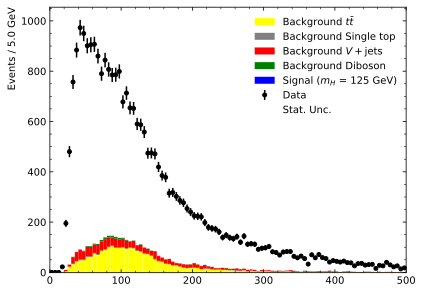

In [29]:
variable_to_plot = 'mass'
# x-axis range of the plot
xmin = 0 * GeV
xmax = 500 * GeV
step_size = 5 * GeV

bin_edges = np.arange(start=xmin, # The interval includes this value
                    stop=xmax+step_size, # The interval doesn't include this value
                    step=step_size ) # Spacing between values
bin_centres = np.arange(start=xmin+step_size/2, # The interval includes this value
                        stop=xmax+step_size/2, # The interval doesn't include this value
                        step=step_size ) # Spacing between values

data_x,_ = np.histogram(ak.to_numpy(all_data['Data'][variable_to_plot]),
                        bins=bin_edges ) # histogram the data
data_x_errors = np.sqrt( data_x ) # statistical error on the data

signal_x = ak.to_numpy(all_data['Signal'][variable_to_plot]) # histogram the signal
signal_weights = ak.to_numpy(all_data['Signal'].totalWeight) # get the weights of the signal events
signal_color = samples['Signal']['color'] # get the colour for the signal bar

mc_x = [] # define list to hold the Monte Carlo histogram entries
mc_weights = [] # define list to hold the Monte Carlo weights
mc_colors = [] # define list to hold the colors of the Monte Carlo bars
mc_labels = [] # define list to hold the legend labels of the Monte Carlo bars

for s in samples: # loop over samples
    if s not in ['Data', 'Signal']: # if not data nor signal
        # if 'V' in s or 'bar' in s:
        #     print(f'skip {s}')
        #     break
        mc_x.append( ak.to_numpy(all_data[s][variable_to_plot]) ) # append to the list of Monte Carlo histogram entries
        mc_weights.append( ak.to_numpy(all_data[s].totalWeight) ) # append to the list of Monte Carlo weights
        mc_colors.append( samples[s]['color'] ) # append to the list of Monte Carlo bar colors
        mc_labels.append( s ) # append to the list of Monte Carlo legend labels

# *************
# Main plot
# *************
main_axes = plt.gca() # get current axes

# plot the data points
main_axes.errorbar(x=bin_centres, y=data_x, yerr=data_x_errors,
                   fmt='ko', # 'k' means black and 'o' is for circles
                   markersize=4, # Adjust the size of the circles
                   label='Data')

# plot the Monte Carlo bars
mc_heights = main_axes.hist(mc_x, bins=bin_edges,
                            weights=mc_weights, stacked=True,
                            color=mc_colors,
                            label=mc_labels )

mc_x_tot = mc_heights[0][-1] # stacked background MC y-axis value

# calculate MC statistical uncertainty: sqrt(sum w^2)
mc_x_err = np.sqrt(np.histogram(np.hstack(mc_x), bins=bin_edges, weights=np.hstack(mc_weights)**2)[0])

# plot the signal bar
main_axes.hist(signal_x, bins=bin_edges, bottom=mc_x_tot,
                weights=signal_weights, color=signal_color,
                label=r'Signal ($m_H$ = 125 GeV)')

# plot the statistical uncertainty
main_axes.bar(bin_centres, # x
                2*mc_x_err, # heights
                alpha=0.5, # half transparency
                bottom=mc_x_tot-mc_x_err, color='none',
                hatch="////", width=step_size, label='Stat. Unc.' )

# set the x-limit of the main axes
main_axes.set_xlim( left=xmin, right=xmax )

# separation of x axis minor ticks
main_axes.xaxis.set_minor_locator( AutoMinorLocator() )

# set the axis tick parameters for the main axes
main_axes.tick_params(which='both', # ticks on both x and y axes
                        direction='in', # Put ticks inside and outside the axes
                        top=True, # draw ticks on the top axis
                        right=True ) # draw ticks on right axis

# write y-axis label for main axes
main_axes.set_ylabel('Events / '+str(step_size)+' GeV',
                        y=1, horizontalalignment='right')

# set y-axis limits for main axes
# main_axes.set_ylim( bottom=0, top=np.amax(data_x)*1.6 )

# add minor ticks on y-axis for main axes
main_axes.yaxis.set_minor_locator( AutoMinorLocator() )

# draw the legend
main_axes.legend( frameon=False ); # no box around the legend

And there we have it. 
We have a nice peak in the invariant mass spectrum somewhere around $125 \, \text{GeV}$,
    the signature of the Higgs boson!


# TODO 

1. Check in the [Hbb paper](https://link.springer.com/article/10.1007/JHEP12(2017)024) what is the total number of events of the signal and background after the selections to see if we are in the right ballpark range.
2. Create a cut flow for the background and the signal, 
    i.e. count the number of events that are cut after each selection, 
    to see the efficiencies of these cuts.
3. Plot histogram of $\Delta\phi$ of the two $b$-tagged jets. i.e. the absolute difference in the azimuthal angle of the two jets 

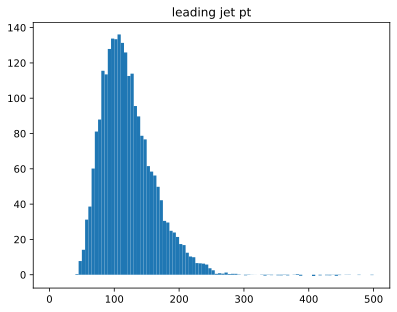

In [30]:
xmin = 0
xmax = 500
step_size = 5 * GeV
bin_edges = np.arange(start=xmin, stop=xmax+step_size, step=step_size )

plt.hist(all_data['Background $t\\bar{t}$']['leading_jet_pt'], weights = all_data['Background $t\\bar{t}$']['totalWeight'], bins=bin_edges)
plt.title("leading jet pt")
plt.show()

In [31]:
with uproot.open(data_15_path + ":analysis") as t:
    tree = t

for data in tree.iterate(variables,
                            library="ak",
                            entry_stop=tree.num_entries): # process up to numevents*fraction
    data_jet = data

In [32]:
test_loose = ak.Array({'lep_isTight':[True, False, True], 'lep_e': [30, 26, 20]})
lepton_loose(test_loose)

<Array [False, True, False] type='3 * bool'>

In [33]:
test_jets = ak.Array({'jet_n':[2,2,3,0],
                      'jet_pt':[[21,21],[30,15],[70,30,30],[]], 
                      'jet_eta':[[-1,1],[-3,1],[-1,-1,0],[]], 
                      'jet_e':[[-1,1],[-3,1],[-1,-1,0],[]], 
                      'jet_btag_quantile':[[2,2], [2, 2], [2, 2, 2],[]],
                      'jet_phi':[[2, 3], [-2, -2], [-11, 222, 300], []],
                      'met_phi': [40,20,20,40],
                      'met': [40,20,20,40]})
select_min_metjets_phi(test_jets)

<Array [True, True, True, None] type='4 * ?bool'>